# Convolutional Neural Networks in Pytorch

In [ ]:
# Convolutional NNs accept 2D or 3D inputs
# Kernel = Window -> (3,3) for exaple that interated over it
# Detect edges, curves, corners etc. -> Second Layer: Find more complex features that edges, corners and curves build (Circles, Squares etc.)

# Pooling: Window -> for example maxpooling, take the maximum value. 

# Conv + MaxPool = HL  Simplify image and look for features 

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False # If you set this true, then the images will be loaded one by one. Since this has alread be done, we do not have to do it anymore. 
# However, if you want to do it, place the folder "PetImages" which is on "/Users/dj/Documents/Python" into the same directory as this jupyter notebook

class DogsVSCats():
    IMG_SIZE = 50 # Make images 50 * 50 -> Because we have different shapes
    CATS = '/Users/dj/Documents/GitHub/Neural-Networks-/Pytorch/PetImages/Cat/'
    DOGS = '/Users/dj/Documents/GitHub/Neural-Networks-/Pytorch/PetImages/Dog/'
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
                for f in tqdm(os.listdir(label)):
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        # print(str(e))
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)


if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [4]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [2]:
training_data = np.load("training_data.npy", allow_pickle = True)
print(len(training_data))

24946


In [30]:
print(training_data[1])

[array([[216, 224, 205, ...,  72,  69,  51],
       [214, 213, 215, ...,  89,  54,  53],
       [219, 211, 209, ...,  99,  69,  47],
       ...,
       [200, 220, 220, ..., 236, 240, 242],
       [200, 207, 217, ..., 237, 239, 243],
       [203, 214, 217, ..., 238, 241, 237]], dtype=uint8)
 array([0., 1.])]


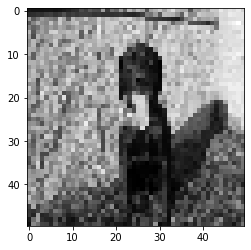

In [41]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0], cmap = "gray")
plt.show()

In [44]:
training_data[1][1] # [1,0] = cat, [0,1] = dog

array([0., 1.])

# Video 6

In [ ]:
training_data = np.load("training_data.npy", allow_pickle = True)
print(len(training_data))

In [3]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32, 5) # 1 = input, 32 concolutional feature, 5 = (5,5) kernel size
        self.conv2 = nn.Conv2d(32,64, 5)
        self.conv3 = nn.Conv2d(64,128, 5)

        # Somehow, one has to flatten it to a output of 2 (cats, dogs), but this seems to be poorly explained by the pytorch documentation
        # self.fc1 = nn.Linear(???, 521) <- How to get the ???

        x = torch.randn(50,50).view(-1, 1,50,50) # -1 = However many input features we have, 1 = one image with shape 50,50 -> Tensor (1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) # We have to run the network one in order to get the number self._to_linear
        self.fc2 = nn.Linear(512, 2) # 2 for cats and dogs

    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2)) # (2,2) = shape of pooling
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

        print(x[0].shape)

        if self._to_linear is None:
            self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2] # 3 Numbers
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear) # <- flattening  # We have to run the network one in order to get the number self._to_linear - here as well
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim = 1) # dim = 1 because of the batches | The x comes as a batch of x's | dim = 0 would be everything, 1 is like a column vector cats and dogs

net = Net()

torch.Size([128, 2, 2])


In [16]:
# Same as before, but without the print

import torch 
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32, 5) # 1 = input, 32 concolutional feature, 5 = (5,5) kernel size
        self.conv2 = nn.Conv2d(32,64, 5)
        self.conv3 = nn.Conv2d(64,128, 5)

        # Somehow, one has to flatten it to a output of 2 (cats, dogs), but this seems to be poorly explained by the pytorch documentation
        # self.fc1 = nn.Linear(???, 521) <- How to get the ???

        x = torch.randn(50,50).view(-1, 1,50,50) # -1 = However many input features we have, 1 = one image with shape 50,50 -> Tensor (1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) # We have to run the network one in order to get the number self._to_linear
        self.fc2 = nn.Linear(512, 2) # 2 for cats and dogs

    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2)) # (2,2) = shape of pooling
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))


        if self._to_linear is None:
            self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2] # 3 Numbers
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear) # <- flattening  # We have to run the network one in order to get the number self._to_linear - here as well
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim = 1) # dim = 1 because of the batches | The x comes as a batch of x's | dim = 0 would be everything, 1 is like a column vector cats and dogs

net = Net()

In [17]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50,50)
X = X/255.0 # Right now the pixel values are between 0 and 255, we want to rescale them between 0 and 1
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1 # Lets test against 10% of our data set
val_size = int(len(X) * VAL_PCT)
print(val_size)

2494


In [24]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [19]:
# Lets train

BATCH_SIZE = 100 # If you get an memory error, lower batch size!
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): #from 0 to amount of training data, step size = BATCH_SIZE
        print(i, i + BATCH_SIZE)

# Output: 0 100 <- First batch is from the 0th to the 100th index... and so on

100%|██████████| 225/225 [00:00<00:00, 34625.51it/s]

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000
1000 1100
1100 1200
1200 1300
1300 1400
1400 1500
1500 1600
1600 1700
1700 1800
1800 1900
1900 2000
2000 2100
2100 2200
2200 2300
2300 2400
2400 2500
2500 2600
2600 2700
2700 2800
2800 2900
2900 3000
3000 3100
3100 3200
3200 3300
3300 3400
3400 3500
3500 3600
3600 3700
3700 3800
3800 3900
3900 4000
4000 4100
4100 4200
4200 4300
4300 4400
4400 4500
4500 4600
4600 4700
4700 4800
4800 4900
4900 5000
5000 5100
5100 5200
5200 5300
5300 5400
5400 5500
5500 5600
5600 5700
5700 5800
5800 5900
5900 6000
6000 6100
6100 6200
6200 6300
6300 6400
6400 6500
6500 6600
6600 6700
6700 6800
6800 6900
6900 7000
7000 7100
7100 7200
7200 7300
7300 7400
7400 7500
7500 7600
7600 7700
7700 7800
7800 7900
7900 8000
8000 8100
8100 8200
8200 8300
8300 8400
8400 8500
8500 8600
8600 8700
8700 8800
8800 8900
8900 9000
9000 9100
9100 9200
9200 9300
9300 9400
9400 9500
9500 9600
9600 9700
9700 9800
9800 9900
9900 10000
10000 10100
10100 10

In [20]:
BATCH_SIZE = 100 # If you get an memory error, lower batch size!
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): 
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50,50)
        batch_y = train_y[i:i+BATCH_SIZE]
        # Now we want to do the fitment. Everytime you're going to a fitment/optimisation, you need to 0 the gradients 

        net.zero_grad()
        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()


print(loss)

100%|██████████| 225/225 [01:51<00:00,  2.02it/s]

tensor(0.2065, grad_fn=<MseLossBackward0>)


In [21]:
print(loss)

tensor(0.2065, grad_fn=<MseLossBackward0>)


In [25]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1,1,50,50))[0]

        #print(real_class, net_out)
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct += 1
        total += 1

print("Accuracy:", round(correct/total,3))

100%|██████████| 2494/2494 [00:04<00:00, 512.00it/s]

Accuracy: 0.627
